In [ ]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sys.path.append(os.path.abspath("../src"))  # Ajuste o caminho para sua pasta src

from utils import descritiva

# Caminho do arquivo pickle
caminho_arquivo = '../data/clean/df_final.pkl'

# Carregar o DataFrame do arquivo pickle
df = pd.read_pickle(caminho_arquivo)

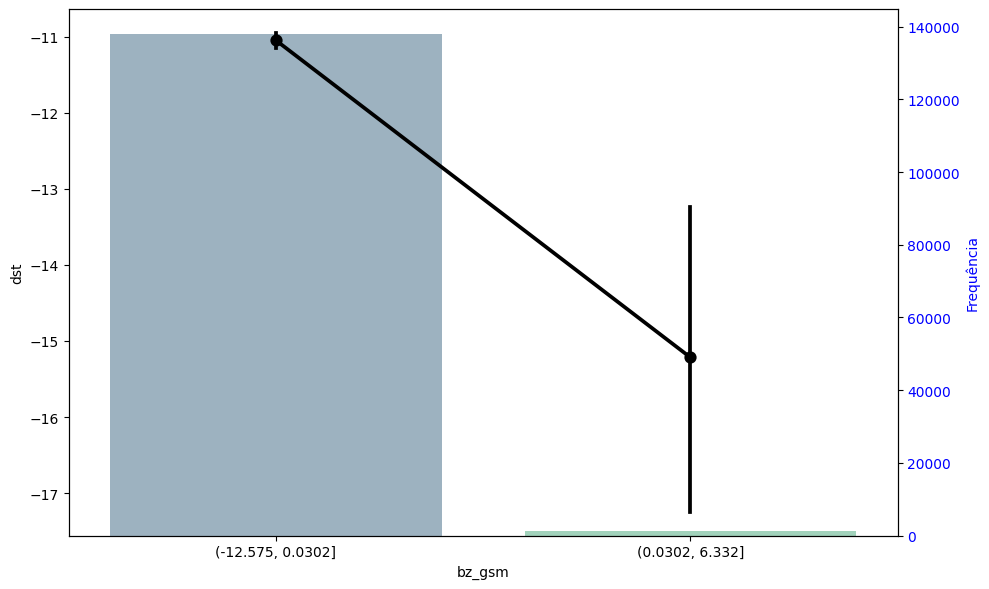

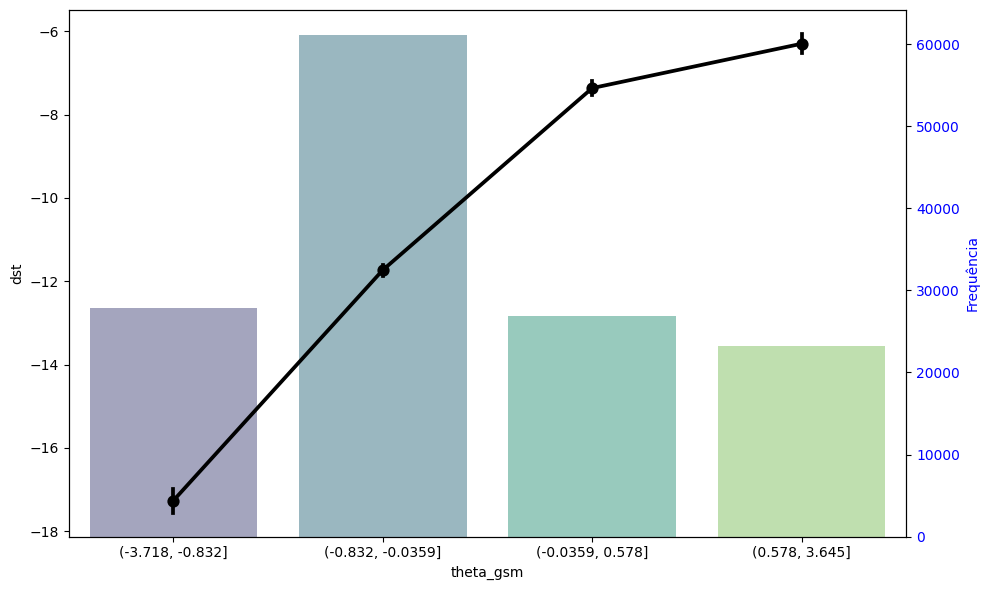

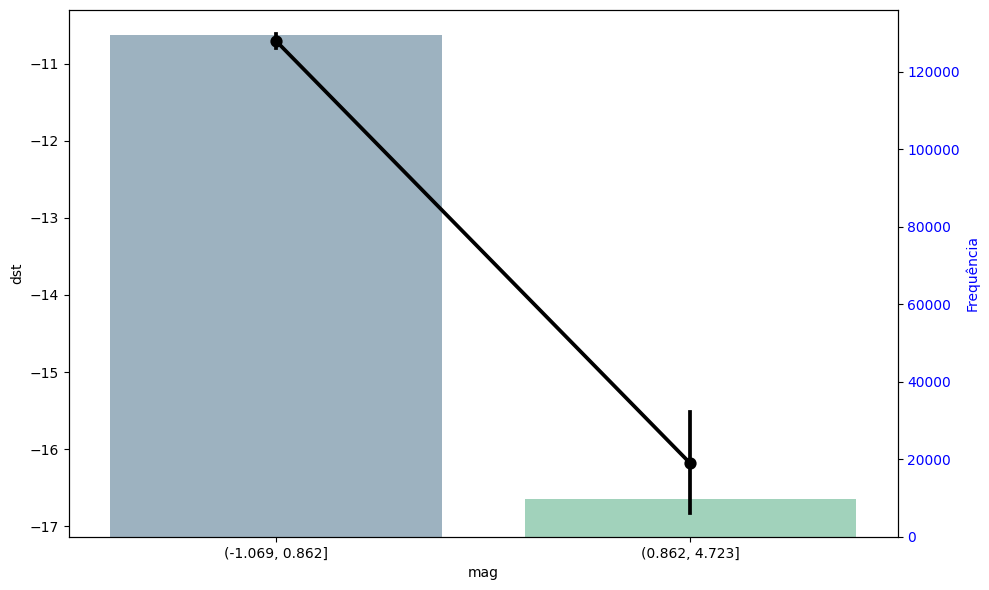

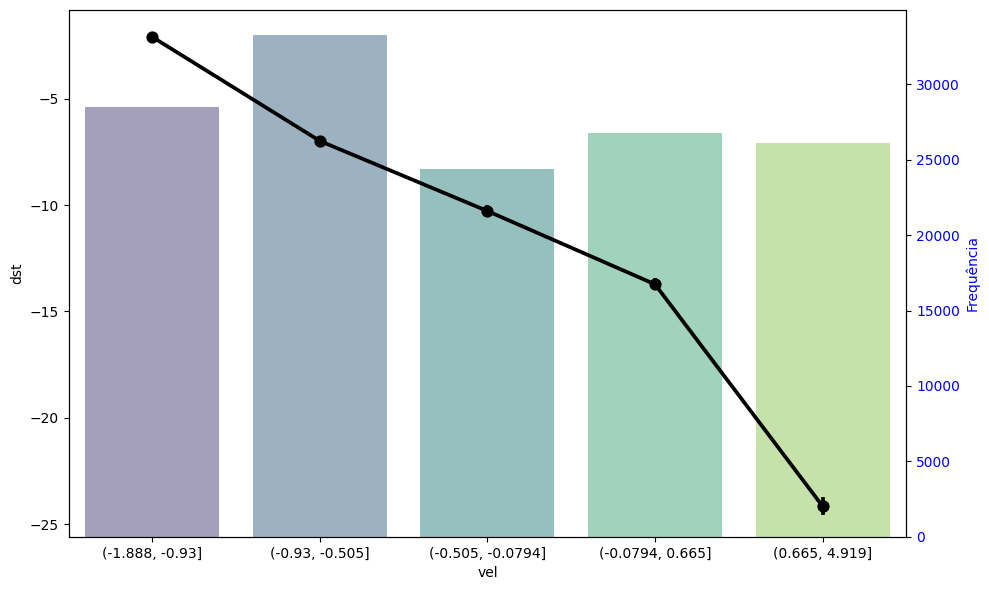

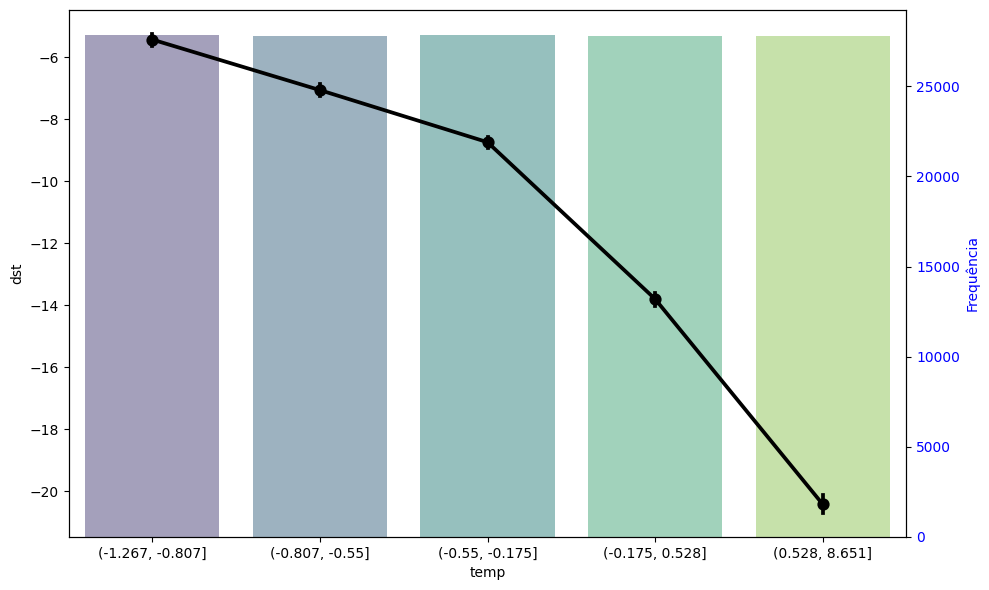

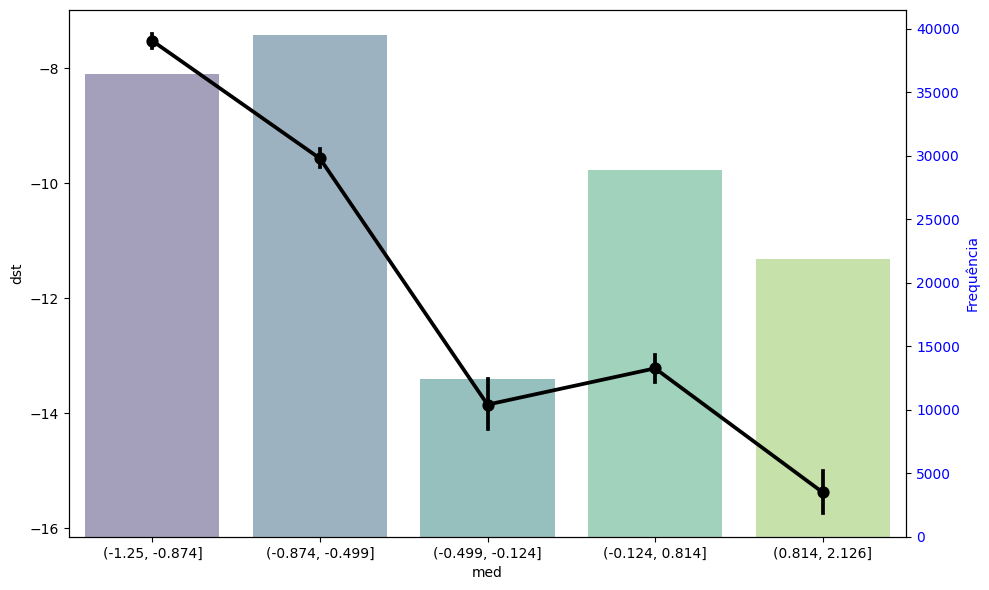

In [3]:
# Excluindo a coluna 'dst' da análise
for col in df.select_dtypes(include=['number']).columns:
    if col != 'dst':  # Ignora a coluna 'dst'
        descritiva(df_=df, var=col, vresp='dst')

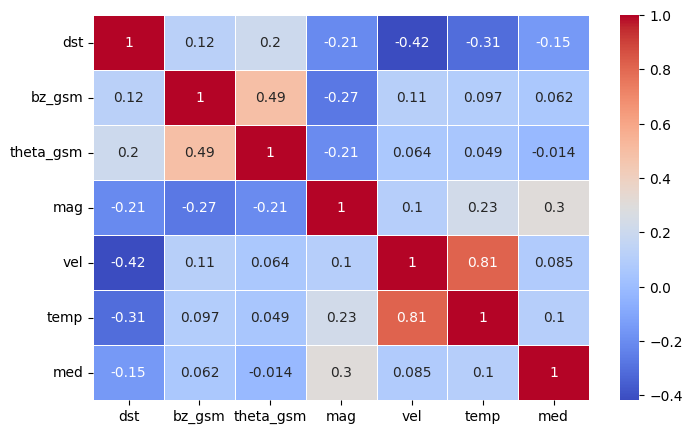

In [4]:
# Matriz de correlações
correlation_matrix = df.iloc[:,0:8].corr()

# Mapa de calor com as correlações entre todas as variáveis quantitativas
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
plt.savefig('corr.png', dpi=100, bbox_inches='tight', pad_inches=0)
plt.show()

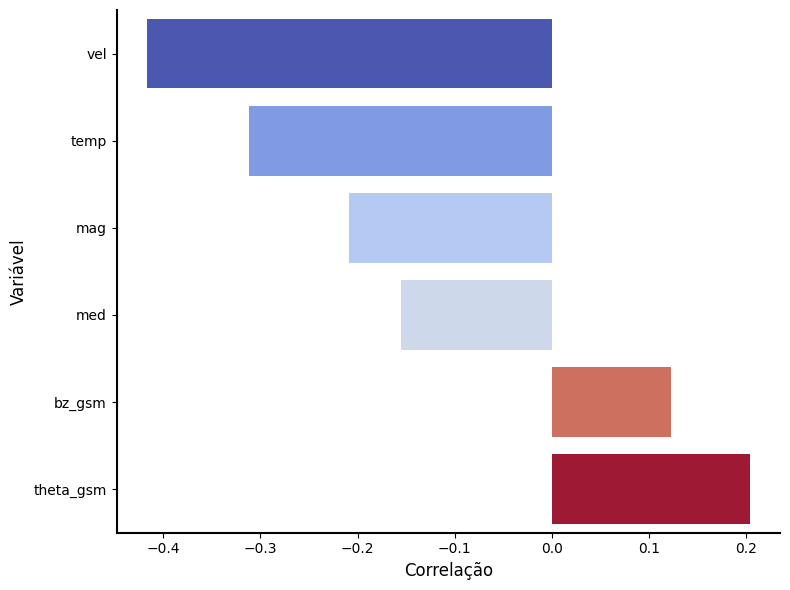

In [8]:
correlation_df = correlation_matrix['dst'].drop('dst').sort_values().reset_index()
correlation_df.columns = ['Variável', 'Correlação']

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=correlation_df,
    x='Correlação',
    y='Variável',
    hue='Correlação',        # usa a própria correlação para colorir
    palette='coolwarm',
    dodge=False,             # para não duplicar barras
    legend=False             # remove legenda desnecessária
)

# Estética
ax.grid(False)  # Remove grade
ax.set_xlabel('Correlação', fontsize=12)
ax.set_ylabel('Variável', fontsize=12)

# Remover bordas superior e direita, reforçar inferior/esquerda
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.tight_layout()
plt.show()


In [9]:
#%% Análise do coeficiente de correlação de Pearson entre as variáveis
import pingouin as pg
pg.rcorr(df[['dst','med', 'temp', 'vel', 'mag','theta_gsm', 'bz_gsm']],
         method = 'pearson', upper = 'pval',
         decimals = 4,
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

,dst,med,temp,vel,mag,theta_gsm,bz_gsm
dst,-,***,***,***,***,***,***
med,-0.1548,-,***,***,***,***,***
temp,-0.3115,0.104,-,***,***,***,***
vel,-0.4171,0.0849,0.8146,-,***,***,***
mag,-0.2086,0.3035,0.2304,0.1034,-,***,***
theta_gsm,0.2042,-0.0138,0.0491,0.0638,-0.2066,-,***
bz_gsm,0.1224,0.0618,0.0969,0.1092,-0.2726,0.4912,-
